In [2]:
import numpy as np
import datetime                         # Handle dates
import pandas as pd
from pyproj import Proj                   # Used to convert between different cord systems, here from UTM33 to WGS84
import matplotlib.pyplot as plt           # For plotting
from mpl_toolkits.basemap import Basemap
import time
from datetime import datetime
from matplotlib.legend_handler import HandlerBase
#There is 3 sets of data given to me: 
#Senorge stations: Done something to it!!
#Eklima stations: Raw: Unsure if both wmo and met is included here...
#Lussanas other list of stations: Raw: This splits wmo and met stations.. 
#Which should I use... 
#
#

In [3]:

def filter_by_area(area):
   """-------------------------
   #GETTING STATION INFO
   
   County: ['Hedmark' 'Østfold' 'Akershus' 'Oppland' 'Trøndelag' 'Oslo' 'Buskerud'  
            'Hordaland' 'Vestfold' 'Telemark' 'Aust-Agder' 'Vest-Agder' 'Rogaland'
             'Sogn Og Fjordane' 'Møre Og Romsdal' 'Nordland' 'Troms' 'Finnmark'
   Region/Country: ['SOUTHEASTERN NORWAY' 'TRØNDELAG' 'NORWAY' 'WESTERN NORWAY' 'AGDER' 'NORTHERN NORWAY']
   
   WHERE:
   ----- 
   SOUTHEASTERN NORWAY = ['Hedmark' 'Østfold' 'Akershus' 'Oppland' 'Oslo' 'Buskerud' 'Vestfold' 'Telemark']
   TRØNDELAG = ['Trøndelag']
   WESTERN NORWAY = ['Hordaland' 'Rogaland' 'Sogn Og Fjordane' 'Møre Og Romsdal']
   AGDER = 'Aust-Agder' 'Vest-Agder']
   NORTHERN NORWAY = ['Nordland' 'Troms' 'Finnmark']
   
   #-------------------------
   """
   #Info of operational stations at the time of Walpurga(From eklima)
   #path_info = "/Users/ainajohannessen/Documents/Aina/skole/master/precipitation/input_data/station_info/ALL_land_stat_info_for_walp"
   path_info = "/Users/ainajohannessen/Documents/Aina/skole/master/precipitation/input_data/station_info/stinfo_last6Y_Norway"
   station_info = pd.read_table(path_info, sep= ";",header = [2])
   station_info = station_info[:-2]
   #station_info = station_info[:664]
   station_info.Longitude = station_info.Longitude.apply(lambda Lon: Lon.replace(',','.')).values.astype(float)
   station_info.Latitude = station_info.Latitude.apply(lambda Lat: Lat.replace(',','.')).values.astype(float)
   station_info.index=station_info.Stnr.astype(str)
   station_info.Stnr = station_info.Stnr.astype(str)
   station_info.Stnr
   #print (station_info["County"].unique())
   
   Counties= ['Hedmark','Østfold','Akershus','Oppland','Trøndelag','Oslo','Buskerud','Hordaland','Vestfold','Telemark','Aust-Agder','Vest-Agder','Rogaland', 'Sogn Og Fjordane','Møre Og Romsdal','Nordland','Troms','Finnmark']
   Region= ['SOUTHEASTERN NORWAY','TRØNDELAG','NORWAY','WESTERN NORWAY','AGDER','NORTHERN NORWAY']
   
   print ("Your chosed area of interest to be: " + str(area))
   
   #if all([z in Counties for z in area]):
   #   df = df[ df['location'].isin( station_info[station_info["County"].isin(area)  ].Stnr  )]   #ISIN
   #if all([z in Region for z in area]):
   #   df = df[ df['location'].isin( station_info[station_info["Region"].isin(area)  ].Stnr  )]   #ISIN
   #df = df[~df['location'].isin(station_info[station_info["County"]==area].Stnr)] #ISNOTIN

   return station_info
station_info = filter_by_area(['WESTERN NORWAY','AGDER'])
#df

Your chosed area of interest to be: ['WESTERN NORWAY', 'AGDER']


/Users/ainajohannessen/anaconda/envs/3point6_lagranto/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


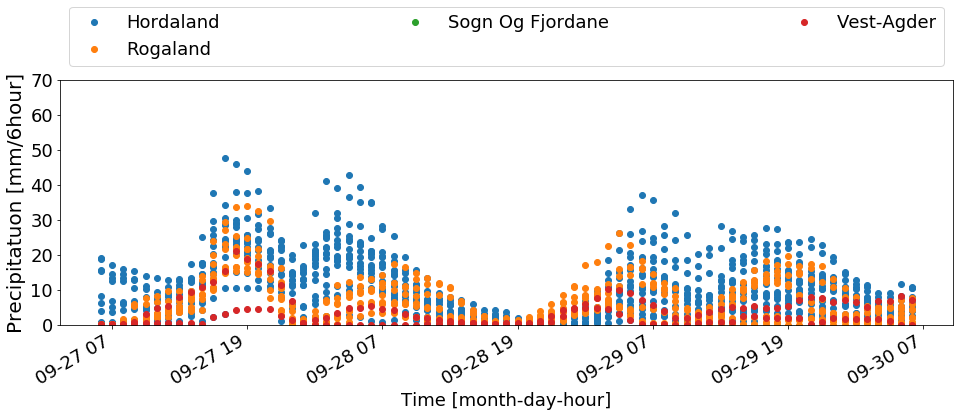

In [29]:
###EKLIMA
#station_info
path_eklima = "/Users/ainajohannessen/Documents/Aina/skole/master/precipitation/input_data/eklima/"

path_hordaland = path_eklima + "2016septoct_Hordaland.txt"
path_rogaland = path_eklima + "2016septoct_rogaland.txt"
path_vestAgder = path_eklima + "2016septoct_vest_agder.txt"
path_austAgder = path_eklima + "2016septoct_aust_agder.txt"
path_sognfjord = path_eklima + "2016septoct_sognfjord.txt"

data_hord = pd.read_csv(path_hordaland, sep=";")
data_hord["St.no"]=data_hord["St.no"].astype(str)
data_rog = pd.read_csv(path_rogaland, sep=";")
data_rog["St.no"]=data_rog["St.no"].astype(str)
data_Vagd = pd.read_csv(path_vestAgder, sep=";")
data_Vagd["St.no"]=data_Vagd["St.no"].astype(str)
data_Aagd = pd.read_csv(path_austAgder, sep=";")
data_Aagd["St.no"]=data_Aagd["St.no"].astype(str)

data_Sfjor = pd.read_csv(path_sognfjord, sep=";")
data_Sfjor["St.no"]=data_Sfjor["St.no"].astype(str)

data_eklima_tot = pd.concat([data_Vagd,data_rog, data_hord, data_Aagd, data_Sfjor] )

#data_eklima_tot = data_hord.copy()

##If needing all info######
eklima_stInfo = station_info[station_info["Stnr"].isin(data_eklima_tot["St.no"].values)]
eklima_obswithinfo = pd.DataFrame(columns =['year', 'month', 'day', 'hour', 'nhour', 'stid', 'x', 'y', 'z',
       'eve.lab', 'yo', 'yb', 'ya', 'yav', 'yidi', 'yidiv', 'dqcflag',
       'Unnamed: 17', 'Stnr', 'Name', 'Operates from', 'Operates until',
       'Altitude', 'Latitude', 'Longitude', 'Municipality', 'County',
       'Region/Country', 'RR_24-Fromdate', 'RR_24-Until', 'RR_12-Fromdate',
       'RR_12-Until', 'RR_1-Fromdate', 'RR_1-Until', 'RR_01-Fromdate',
       'RR_01-Until'])
#eklima_obswithinfo = pd.concat([eklima_obswithinfo, result], axis = 0)
###########################

#Prep for plotting
def times(df1):    
    y = df1[0]
    m = df1[1]
    d = df1[2]
    h = df1[3]
    dt = pd.datetime(y,m,d,h)#.DatetimeIndex[source]¶ pd.datetime(y,m,d,h)
    return dt

def get_hourly(group): #group = one station at a time
    #set time as index for easy plotting
    group.index = group[["Year", "Mnth", "Date","Time(UTC)"]].apply(times, axis = 1) 
    #Remove -9999 = missing values and "x" = not permission
    group["RR_1"].replace(to_replace=[-9999, "x", "-9999"], value=np.nan, inplace=True) 
    
    RR1 = pd.DataFrame(index = group.index) #New dataframe containing only whats necessary
    #county per station, but it will be reapeting the same county, so keep only one with unique()
    eklima_stInfo = station_info[station_info["Stnr"].isin(group["St.no"].values)].copy() #only info of eklimastations
    county = np.unique( eklima_stInfo["County"] )
    lat = np.unique( eklima_stInfo["Latitude"] )
    lon = np.unique( eklima_stInfo["Longitude"] )
    if county:
        RR1["County"] = county[0]
        RR1["Longitude"] = lon[0]
        RR1["Latitude"] = lat[0]
        
    else:
        #In case there is missing info about the county
        RR1["County"] = np.nan 
        RR1["Longitude"] = np.nan
        RR1["Latitude"] = np.nan

    RR1["Year"] = group["Year"].values  
    RR1["Mnth"] = group["Mnth"].values  
    RR1["day"] = group["Date"].values  
    RR1["Time(UTC)"] = group["Time(UTC)"].values  
    RR1["St.no"] = group["St.no"].values   
    RR1["RR_1"] = group["RR_1"].values.astype(float) #hourly precip
    return RR1

grdata_tot = data_eklima_tot.groupby(["St.no"]) #Groups the data by station
RR1 = grdata_tot.apply(get_hourly); # apply function to every station
RR1.index=RR1.index.droplevel(level=0)
#RR1["Longitude"] = lon[0]
RR1 = RR1[RR1["Latitude"]<=61]
RR1 = RR1[RR1["Latitude"]>=58]
RR1 = RR1[RR1["Longitude"]<=7]
RR1 = RR1[RR1["Longitude"]>=5]
all_stid = RR1["St.no"].unique()
ro = []
dic1 = {}
period=6
for sid in all_stid:
    df1 = RR1[RR1["St.no"]==sid]
    roll = RR1["RR_1"].rolling(period).sum() #rolling sum for one spec station
    RR1["RR_6"] = roll[RR1.index == roll.index]
    dic1[sid] = roll[:]
ndf = pd.DataFrame(dic1)


#RR1["RR_6"] = ndf[(ndf.keys==RR1["St.no"]) & ]
fig, ax = plt.subplots(figsize=(16,5))
RR1 = RR1.loc["2016-09",:]
RR1 = RR1[RR1.day.isin([27, 28, 29, 30])]#,30])]
RR1 = RR1[~ ((RR1.day==27) & (RR1.index.hour.isin([0, 1, 2, 3, 4, 5 ])))]
RR1 = RR1[~ ((RR1.day==30) & (RR1.index.hour.isin([7, 8, 9, 10, 11, 12,13,14,15,16,17,18,19,20,21,22,23,24])))]

RR1_co = RR1.groupby("County")
RR1_co["RR_6"].plot(ax = ax, style ="o", fontsize=18 )
leg = plt.legend(sorted(RR1.County.unique()), bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", ncol = 3, fontsize=18)
plt.ylabel("Precipitatuon [mm/6hour]", fontsize=20)
plt.xlabel("Time [month-day-hour]", fontsize=18)
ax.set_ylim(0, 70)
#ax.set_xlim(1, -1)

plt.show()


LH = leg.legendHandles
ln = len(LH)
names = sorted(RR1.County.unique())
name_color = {}



for i in range(0,ln):
    c = LH[i].get_color()
    nam = names[i]
    name_color[nam] = c
#print(name_color.get("Østfold"))


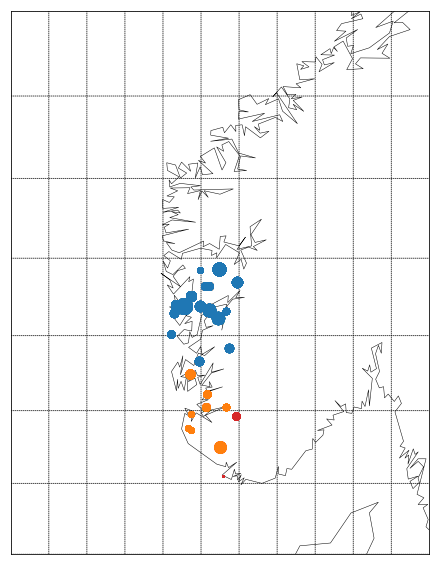

In [30]:
data_eklima_tot_cleaned = RR1.copy()
fig, ax = plt.subplots(figsize=(10,10))
#fig = plt.figure()
#map = Basemap( llcrnrlon = 3., llcrnrlat = 58., urcrnrlon = 10., urcrnrlat=63.,\
#            resolution = 'l', area_thresh = 10000., projection = 'merc' )

map = Basemap( llcrnrlon = 1., llcrnrlat = 57., urcrnrlon = 12., urcrnrlat=64.,\
            resolution = 'l', area_thresh = 10000., projection = 'merc' )


#RR1_co["RR_1"] #2016-09-27 00:00:00    0.000000e+00
#RR1["RR_6"]
map.drawcoastlines( linewidth = 0.5, linestyle = 'solid', color = "k", zorder=5)
map.drawparallels(np.arange(55,72,1.0), labels=[False,False,False,False] )
map.drawmeridians(np.arange(0,30,1.0), labels=[False,False,False,False] );
#x_mesh,y_mesh
x_rst_mapped,y_rst_mapped = map(data_eklima_tot_cleaned.Longitude.values.astype(float), data_eklima_tot_cleaned.Latitude.values.astype(float) )
#ax.annotate( my_NVE_station_info['STATION_NAME'],(x_rst_mapped,y_rst_mapped), xytext=(-1, -1), textcoords='offset points')
#ax.scatter(x_rst_mapped,y_rst_mapped) 
for i, ( stid) in enumerate( zip( data_eklima_tot_cleaned["St.no"].unique() ), start=1 ):
    st = "{0}".format(stid)
    x_r,y_r = map( data_eklima_tot_cleaned[data_eklima_tot_cleaned["St.no"].values == stid].Longitude.values.astype(float), data_eklima_tot_cleaned[data_eklima_tot_cleaned["St.no"].values == stid].Latitude.values.astype(float) )
    yomax = data_eklima_tot_cleaned[data_eklima_tot_cleaned["St.no"].values == stid].RR_6.max()
    c = data_eklima_tot_cleaned[data_eklima_tot_cleaned["St.no"].values == stid].County.unique()[0]
    markersize = (yomax/30 )*10
    color = name_color.get(c)
    ax.plot( x_r, y_r, 'o', markersize=markersize, color = color, zorder = 100 );

plt.show()

In [5]:
#df1 = 
#def prec_time(period):
#    ro = []
#    dic1 = {}
#    all_stid = df["stid"].unique()
#    for sid in all_stid:
#        df1 = df[df["stid"]==sid]
#        roll = df1[ "yo" ].rolling(period).sum() #rolling sum for one spec station
#        dic1[sid] = roll[:]
           
#fig, ax = plt.subplots(figsize=(16,5))
#ndf = pd.DataFrame(dic1)
#ax.plot(ndf,"o")
#ax.set_xlabel( "Date")
#ax.set_ylabel( "precip [mm]" )
#ax.set_title('{} hourly precipitation [mm/6hour]'.format(period), fontsize = 20)    


In [16]:
RR1_co["RR_6"]
#df["senorge6h_mean"]

AttributeError: Cannot access attribute 'values' of 'SeriesGroupBy' objects, try using the 'apply' method

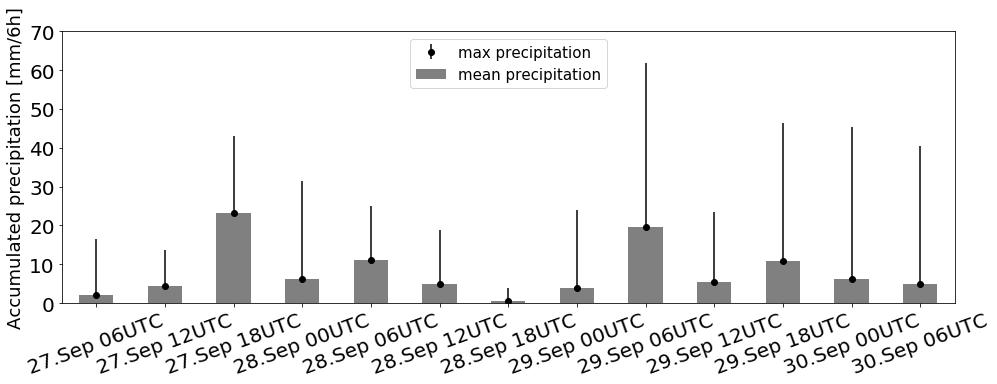

In [25]:
import numpy as np
import matplotlib                                       
import matplotlib.pyplot as plt                         
import pandas as pd
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

##CHOSEFILE:###
filein="/Users/ainajohannessen/Documents/Aina/skole/master/trajectoryruns/upt_ivt_prec_csv/nawdex-case_senorge/nawdex_case.csv"
df = pd.read_csv(filein, sep=";")
###############
df
################################################
###SETTING NICER DATE FORMAT FOR XAXIS#########
new_date_format=[]
for date_hours in df["date_hour"].values:
    month=date_hours[4:6]
    if month=="12":
        month="Dec"
    elif month=="9" or month=="09":
        month="Sep"
    day=date_hours[6:8]
    time=date_hours[9:11]
    new_string = day+"."+month+" " + time + "UTC"
    new_date_format.append(new_string)
newnew = pd.Series(new_date_format)
df.set_index(newnew.values,inplace=True)
################################################
################################################


#Plot1
fig, ax = plt.subplots(figsize=(16,5))
#ax3 = ax.twinx()
x=RR1["RR_6"].index
xx=df["senorge6h_mean"].index
#print(xx.values)
#ax.plot(x.values, RR1["RR_6"].values, style ="o", fontsize=18 )

asymmetric_error = [df["senorge6h_mean"]-df["senorge6h_mean"], df["senorge6h_max"]- df["senorge6h_mean"].values]
ax.errorbar(df.date_hour,df["senorge6h_mean"], yerr=asymmetric_error, fmt='o', color="k")
df["senorge6h_mean"].plot(ax=ax,kind="bar", color="gray")
#
for tick in ax.get_xticklabels(): #Rotate the xlabels
    tick.set_rotation(20)
    tick.set_fontsize(20)
    
for tick in ax.get_yticklabels(): #Rotate the xlabels
    tick.set_fontsize(20)    

#ax.set_xlim(size=15)
#ax.xticks(fontsize=14, rotation=90)
ax.set_ylim(0, 70)
#ax.set_xlabel("Time", size=15)#    
ax.set_ylabel("Accumulated precipitation [mm/6h]", size=18)
ax.legend([ "max precipitation", "mean precipitation"],loc=9,prop={'size': 15})

plt.show()

#





In [ ]:
df

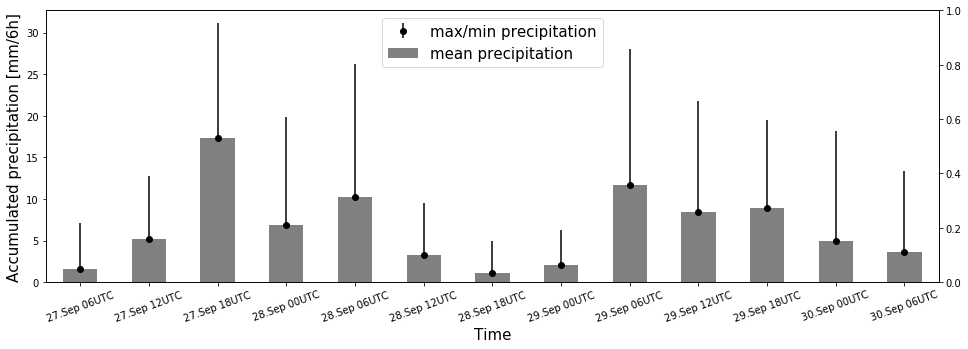

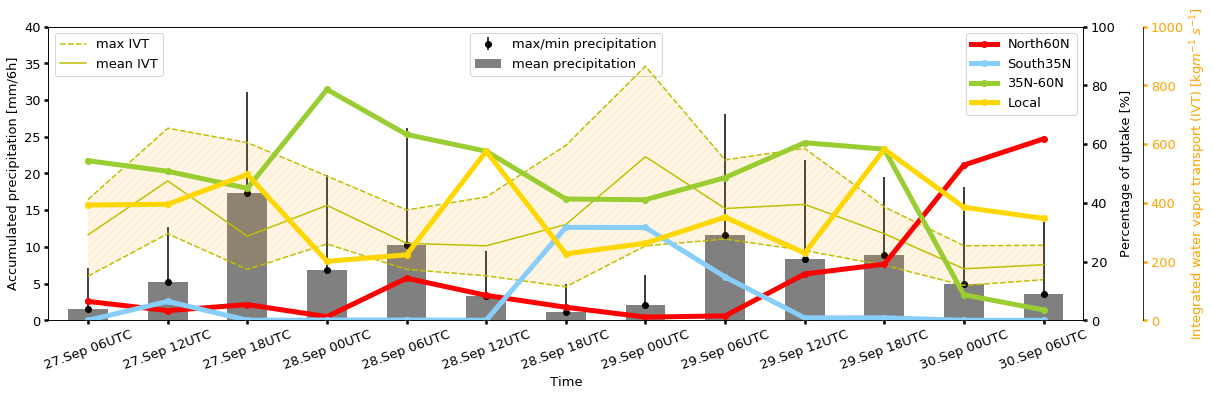

In [23]:
import numpy as np
import matplotlib                                       
import matplotlib.pyplot as plt                         
import pandas as pd
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

##CHOSEFILE:###
filein="/Users/ainajohannessen/Documents/Aina/skole/master/trajectoryruns/upt_ivt_prec_csv/nawdex-case/nawdex_case.csv"
#filein="/Users/ainajohannessen/Documents/Aina/skole/master/trajectoryruns/upt_ivt_prec_csv/nawdex-case/aina_case.csv"
#filein="/Users/ainajohannessen/Documents/Aina/skole/master/trajectoryruns/upt_ivt_prec_csv/nawdex-case/birk_case.csv"
df = pd.read_csv(filein, sep=";")
###############

################################################
###SETTING NICER DATE FORMAT FOR XAXIS#########
new_date_format=[]
for date_hours in df["Date_hour"].values:
   month=date_hours[4:6]
   if month=="12":
      month="Dec"
   elif month=="9" or month=="09":
      month="Sep"

   day=date_hours[6:8]
   time=date_hours[9:11]
   new_string = day+"."+month+" " + time + "UTC"
   new_date_format.append(new_string)
newnew = pd.Series(new_date_format)
df.set_index(newnew.values,inplace=True)
################################################
################################################


#Plot1
fig, ax = plt.subplots(figsize=(16,5))
ax3 = ax.twinx()
#df["6h_prec_fldmean"]-df["6h_prec_min"]
asymmetric_error = [df["6h_prec_fldmean"]-df["6h_prec_fldmean"], df["6h_prec_max"]- df["6h_prec_fldmean"].values]
ax.errorbar(df.Date_hour,df["6h_prec_fldmean"], yerr=asymmetric_error, fmt='o', color="k")
df["6h_prec_fldmean"].plot(ax=ax,kind="bar", color="gray")
#
for tick in ax.get_xticklabels(): #Rotate the xlabels
    tick.set_rotation(20)

ax.set_xlabel("Time", size=15)#    
ax.set_ylabel("Accumulated precipitation [mm/6h]", size=15)
#ax3.set_ylabel("Percentage of uptake [%]", size=15)
#
#df.Norh60N.plot(ax=ax3, style='-o', color="red", linewidth=5.0)
#df.South35N.plot(ax=ax3, style='-o', color="lightskyblue", linewidth=5.0)
#df["35N-60N"].plot(ax=ax3, style='-o', color="yellowgreen", linewidth=5.0)
#df["Local"].plot(ax=ax3, style='-o', color="gold", linewidth=5.0)
#ax3.legend(["North60N", "South35N", "35N-60N", "Local"]);
ax.legend([ "max/min precipitation", "mean precipitation"],loc=9,prop={'size': 15})

plt.show()

#Plot2
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, host = plt.subplots(figsize=(23, 6))
fig.subplots_adjust(right=0.75)#bottom
fig.subplots_adjust(bottom=0.2)#bottom
par2 = host.twinx()

par1 = host.twinx()

par2.spines["right"].set_position(("axes", 2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

asymmetric_error = [df["6h_prec_fldmean"]-df["6h_prec_fldmean"], df["6h_prec_max"]- df["6h_prec_fldmean"].values]
host.errorbar(df.Date_hour,df["6h_prec_fldmean"], yerr=asymmetric_error, fmt='o', color="k")
p1=df["6h_prec_fldmean"].plot(ax=host,kind="bar", color="gray")

df["ivt_min"].plot(ax=par2, style='y--')
df["ivt_mean"].plot(ax=par2, style='y-')
df["ivt_max"].plot(ax=par2, style='y--')
par2.fill_between( df.index,df["ivt_min"], df["ivt_max"], color="orange", alpha=0.1, hatch = '///',  edgecolor='orange')

df.Norh60N.plot(ax=par1, style='-o', color="red", linewidth=5.0)
df.South35N.plot(ax=par1, style='-o', color="lightskyblue", linewidth=5.0)
df["35N-60N"].plot(ax=par1, style='-o', color="yellowgreen", linewidth=5.0)
df["Local"].plot(ax=par1, style='-o', color="gold", linewidth=5.0)
par1.legend(["North60N", "South35N", "35N-60N", "Local"], prop={'size': 13},loc=1);
par2.legend([ "max IVT", "mean IVT"],loc=2,prop={'size': 13})
host.legend([ "max/min precipitation", "mean precipitation"],loc=9,prop={'size': 13})

for tick in host.get_xticklabels(): #Rotate the xlabels
    tick.set_rotation(20)

host.set_xlabel("Time", size=13)#    
host.set_ylabel("Accumulated precipitation [mm/6h]", size=13)
par1.set_ylabel("Percentage of uptake [%]", size=13)
par2.set_ylabel('Integrated water vapor transport (IVT) [kg$m^{-1}$ $s^{-1}$]', color="orange", size=13)

host.set_ylim(0,40)  #precip limit
par2.set_ylim(0,1000) #IVT limit
par1.set_ylim(0,100) # perclimit
#max 40 precip
#max 950
par2.spines['right'].set_position(('outward', 60))
tkw = dict(size=4, width=2.5, labelsize=13)
par2.tick_params(axis='y', **tkw, colors="orange")
par1.tick_params(**tkw)
host.tick_params(**tkw)

plt.show()
fig.savefig('Aina.png', dpi=fig.dpi)








In [31]:
RR1

County  Longitude  Latitude  Year  Mnth  day  \
2016-09-27 06:00:00        Vest-Agder     6.9827   58.2435  2016     9   27   
2016-09-28 06:00:00        Vest-Agder     6.9827   58.2435  2016     9   28   
2016-09-29 06:00:00        Vest-Agder     6.9827   58.2435  2016     9   29   
2016-09-30 06:00:00        Vest-Agder     6.9827   58.2435  2016     9   30   
2016-09-27 06:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 07:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 08:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 09:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 10:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 11:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 12:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 13:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 14:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 15:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 16:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 17:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 18:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 19:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 20:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 21:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 22:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-27 23:00:00        Vest-Agder     6.5675   58.1090  2016     9   27   
2016-09-28 00:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 01:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 02:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 03:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 04:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 05:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 06:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
2016-09-28 07:00:00        Vest-Agder     6.5675   58.1090  2016     9   28   
...                               ...        ...       ...   ...   ...  ...   
2016-09-30 06:00:00         Hordaland     5.5833   60.8347  2016     9   30   
2016-09-27 06:00:00         Hordaland     5.2108   60.8462  2016     9   27   
2016-09-27 12:00:00         Hordaland     5.2108   60.8462  2016     9   27   
2016-09-27 18:00:00         Hordaland     5.2108   60.8462  2016     9   27   
2016-09-28 06:00:00         Hordaland     5.2108   60.8462  2016     9   28   
2016-09-28 12:00:00         Hordaland     5.2108   60.8462  2016     9   28   
2016-09-28 18:00:00         Hordaland     5.2108   60.8462  2016     9   28   
2016-09-29 06:00:00         Hordaland     5.2108   60.8462  2016     9   29   
2016-09-29 12:00:00         Hordaland     5.2108   60.8462  2016     9   29   
2016-09-29 18:00:00         Hordaland     5.2108   60.8462  2016     9   29   
2016-09-30 06:00:00         Hordaland     5.2108   60.8462  2016     9   30   
2016-09-27 06:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   27   
2016-09-27 12:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   27   
2016-09-27 18:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   27   
2016-09-28 06:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   28   
2016-09-28 12:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   28   
2016-09-28 18:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   28   
2016-09-29 06:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   29   
2016-09-29 12:00:00  Sogn Og Fjordane     5.4250   60.9585  2016     9   29   
20